In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
train = pd.read_csv('train.csv')
structures = pd.read_csv('structures.csv')

### Explore all the default features

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


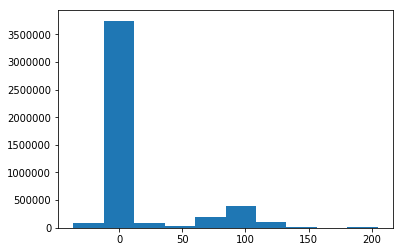

In [5]:
plt.figure()
plt.hist(train.scalar_coupling_constant)
plt.show()

In [6]:
train.molecule_name.unique().size

85003

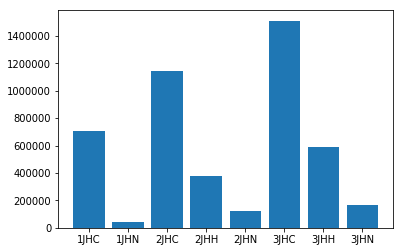

In [7]:
type_count = train[['type', 'id']].groupby('type').count()
plt.figure()
plt.bar(type_count.index, type_count.id)
plt.show()

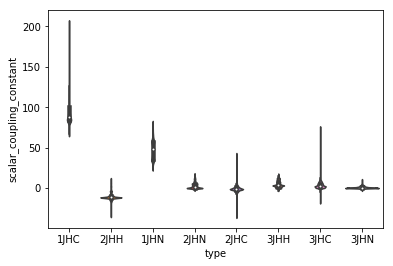

In [8]:
plt.figure()
sns.violinplot('type', 'scalar_coupling_constant', data=train)
plt.show()

### Make Distance Feature

In [9]:
mrg1 = pd.merge(train, structures, how='left', 
         left_on=['molecule_name', 'atom_index_0'],
         right_on=['molecule_name', 'atom_index'])
mrg1.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,0.002150,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1,H,0.002150,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1,H,0.002150,-0.006031,0.001976
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1,H,0.002150,-0.006031,0.001976
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,2,H,1.011731,1.463751,0.000277


In [10]:
mrg2 = pd.merge(mrg1, structures, how='left',
                left_on=['molecule_name', 'atom_index_1'],
                right_on=['molecule_name', 'atom_index'],
                suffixes=('_0', '_1'))
mrg2.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index_0,atom_0,x_0,y_0,z_0,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,0.002150,-0.006031,0.001976,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1,H,0.002150,-0.006031,0.001976,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1,H,0.002150,-0.006031,0.001976,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1,H,0.002150,-0.006031,0.001976,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,2,H,1.011731,1.463751,0.000277,0,C,-0.012698,1.085804,0.008001


In [11]:
df = mrg2.drop(columns=['atom_index_0', 'atom_index_1'])
df.head()

,id,molecule_name,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [12]:
d = np.sqrt((df.x_1 - df.x_0)**2 + (df.y_1 - df.y_0)**2 + (df.z_1 - df.z_0)**2)
d.head()

0    1.091953
1    1.783120
2    1.783147
3    1.783157
4    1.091952
dtype: float64

In [13]:
df1 = df.assign(d=d)
df1.head()

,id,molecule_name,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,d
0,0,dsgdb9nsd_000001,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953
1,1,dsgdb9nsd_000001,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120
2,2,dsgdb9nsd_000001,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147
3,3,dsgdb9nsd_000001,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157
4,4,dsgdb9nsd_000001,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952


In [14]:
df1.shape

(4658147, 13)

In [15]:
df1_s = df1.loc[0:100000].copy()

### Explore Relationship Between Distance and SCC

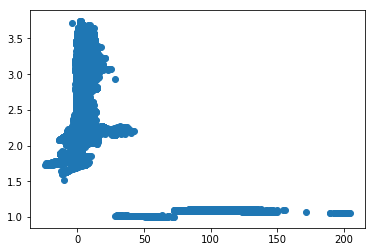

In [16]:
plt.scatter(df1_s.loc[:,'scalar_coupling_constant'], df1_s.loc[:,'d'])
plt.show()

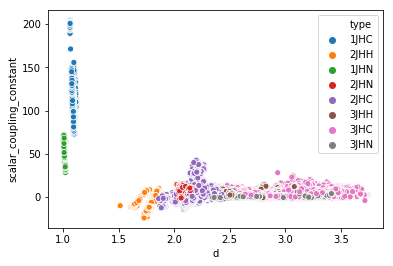

In [17]:
sns.scatterplot('d', 'scalar_coupling_constant', 'type', data=df1_s)
plt.show()

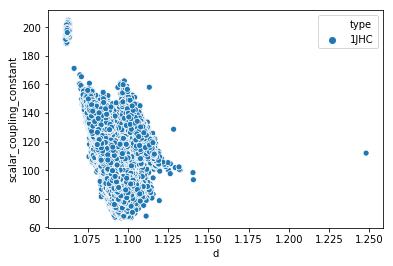

In [18]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '1JHC'])
plt.show()

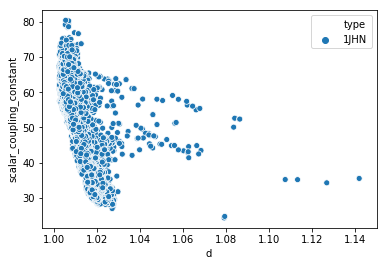

In [19]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '1JHN'])
plt.show()

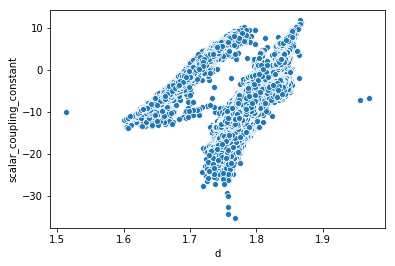

In [22]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '2JHH'])
plt.show()

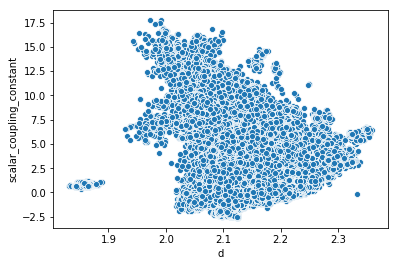

In [21]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '2JHN'])
plt.show()

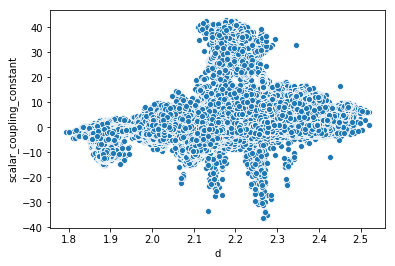

In [23]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '2JHC'])
plt.show()

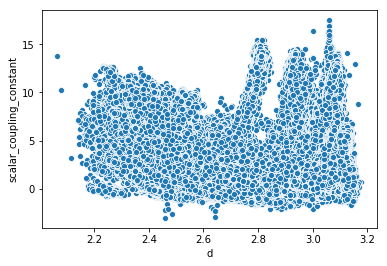

In [24]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '3JHH'])
plt.show()

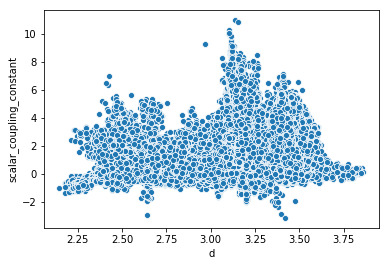

In [25]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '3JHN'])
plt.show()

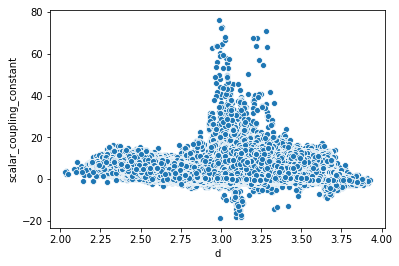

In [26]:
sns.scatterplot('d', 'scalar_coupling_constant', data=df1.loc[df1.loc[:,'type'] == '3JHC'])
plt.show()

### Explore Other Features

In [27]:
sc_contribs = pd.read_csv('scalar_coupling_contributions.csv')
sc_contribs.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [28]:
sc_contribs.describe()

,atom_index_0,atom_index_1,fc,sd,pso,dso
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,1.335689e+01,5.883966e+00,1.569776e+01,8.233637e-02,3.751619e-01,-2.336117e-01
std,3.267712e+00,4.993943e+00,3.441461e+01,1.386516e-01,7.422133e-01,9.296036e-01
min,0.000000e+00,0.000000e+00,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00
25%,1.100000e+01,2.000000e+00,-2.129645e-01,-1.438100e-02,-3.506500e-02,-3.734250e-01
50%,1.300000e+01,5.000000e+00,2.327140e+00,5.072900e-02,1.594810e-01,-6.476600e-02
75%,1.600000e+01,8.000000e+00,7.472885e+00,1.303520e-01,4.350445e-01,1.433210e-01
max,2.800000e+01,2.800000e+01,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00


### What's our error if we just get the fc?

In [29]:
fc_merge = pd.merge(train, sc_contribs, on=['molecule_name', 'atom_index_0', 'atom_index_1'])
fc_merge.head()

,id,molecule_name,atom_index_0,atom_index_1,type_x,scalar_coupling_constant,type_y,fc,sd,pso,dso
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1JHC,83.0224,0.254579,1.25862,0.272010
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1JHC,83.0222,0.254585,1.25861,0.272013


In [30]:
fc_err = (fc_merge.fc - fc_merge.scalar_coupling_constant) / fc_merge.scalar_coupling_constant

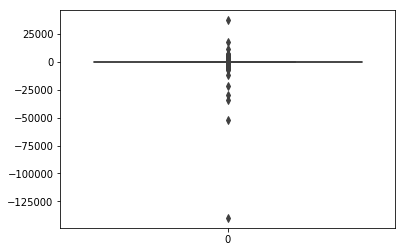

In [31]:
sns.boxplot(data=fc_err)

## Other data files

In [32]:
dipoles = pd.read_csv('dipole_moments.csv')
dipoles.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [33]:
mulliken = pd.read_csv('mulliken_charges.csv')
mulliken.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [34]:
shielding = pd.read_csv('magnetic_shielding_tensors.csv')
shielding.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [35]:
potential = pd.read_csv('potential_energy.csv')
potential.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


### Plotting Single Molecule in 3D

In [ ]:
# read in each atom line by line
m_name = df1.loc[0, 'molecule_name']
m_name

In [ ]:
from collections import namedtuple

In [ ]:
Atom = namedtuple('Atom', ['elt', 'x', 'y', 'z'])

In [ ]:
atoms = {'elt': [], 'x': [], 'y': [], 'z': []}

with open(f'structures/{m_name}.xyz') as f:
    n = f.readline()
    f.readline()
    
    for _ in range(int(n)):
        elt, x, y, z = f.readline().split()
        atoms['elt'].append(elt)
        atoms['x'].append(float(x))
        atoms['y'].append(float(y))
        atoms['z'].append(float(z))

In [ ]:
atoms = pd.DataFrame(atoms)

In [ ]:
# this looks like a methane molecule
plt.figure()
sns.scatterplot(x='y', y='z', hue='elt', data = atoms)

### Idea for dealing with molecules

Molecules all have different numbers of atom and types of atoms. Is there a way to reduce them all to a vector of latent features?

### Ideas for new features

1. Get nearest atoms to the pair being compared.
2. Do something with the magnetic shielding tensors. What do each of the entries of the tensor represent?
3. Get vector that points to the other molecule. Can use this with the magnetic shielding tensor?
4. Close-form equations for some types of j-coupling?
5. Other attempts at this problem?